In [1]:
# load required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
%matplotlib inline

# load required functionality from keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, AveragePooling2D
from keras.models import Model
from keras.layers import Lambda
from keras.layers import Input
from keras.layers import UpSampling2D
from keras.layers import concatenate
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation
from keras.layers import Add, Subtract
from keras.callbacks import ModelCheckpoint, EarlyStopping, History 
from keras.optimizers import RMSprop, Adadelta, Adam
from keras.utils import np_utils
from keras import backend as keras_backend


from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
keras_backend.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6231541968840854257
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6700198133
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9980481534446042780
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


['/job:localhost/replica:0/task:0/device:GPU:0']

    track_id       image_path       lp  train
0  s01_l01_1  s01_l01/1_1.png  7C24698      1
1  s01_l01_2  s01_l01/2_1.png  7C24698      1
2  s01_l01_2  s01_l01/2_2.png  7C24698      1
3  s01_l01_2  s01_l01/2_3.png  7C24698      1
4  s01_l01_2  s01_l01/2_4.png  7C24698      1
182336
1200
2400
3600
4800
6000
7200
8400
9600
10800
12000
13200
14400
15600
16800
18000
19200
20400
21600
22800
24000
25200
26400
27600
28800
30000
31200
32400
33600
34800
36000
37200
38400
39600
40800
42000
43200
44400
45600
46800
48000
49200
50400
51600
52800
54000
55200
56400
57600
58800
60000
61200
62400
63600
64800
66000
67200
68400
69600
70800
72000
73200
74400
75600
76800
78000
79200
80400
81600
82800
84000
85200
86400
87600
88800
90000
91200
92400
93600
94800
96000
97200
98400
99600
100800
102000
103200
104400
105600
106800
108000
109200
110400
111600
112800
114000
115200
116400
117600
118800
120000
121200
122400
123600
124800
126000
127200
128400
129600
130800
132000
133200
20000
(20000, 32, 128, 3)


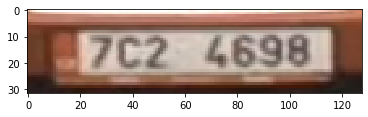

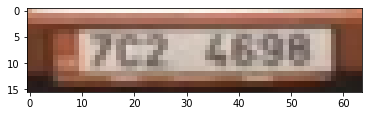

'\nfor i in range(800):\n    #str(i).zfill(4)\n    #format(i, \'04d\')\n    img = cv2.imread("../../DIV2K_train_HR/"+ format(i+1, \'04d\') + ".png")\n    print(img.shape)\n    #plt.imshow(img)\n    #plt.show()\n\nimg = cv2.imread("../../DIV2K_train_HR/0002.png")\nimg2 = img[0:1024, 0:1024,:]\nimg2 = img2[...,::-1] #bgr to rgb, inverse last 3 bgr to rgb\nplt.imshow(img2)\nplt.show()\n'

In [2]:
"""
    Reading Data from files
"""
import gc

data = pd.read_csv("../../image/trainVal.csv")
#print(data)
print(data.head())
#inputX = data[["Unnamed: 0", "w1 = 4"]].to_numpy() #需要為 np.array 的形式!

print(len(data))#182336

#train valid test
#total 105924
dataX = np.zeros((20000, 16, 64, 3), dtype=int)
dataY = np.zeros((20000, 32, 128, 3), dtype=int)
count = 0

""" 
# not load test yet, due to not enough memory
finalTestX = np.zeros((76412, 32, 128, 3), dtype=int)
finalTestY = np.zeros((76412, 32, 128, 3), dtype=int)
testCount = 0
"""

#cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) → dst
i = 0
for j in range(len(data)):
    #img = cv2.imread("../../image/s01_l01/1_1.png")
    if data["train"][i] == 1:
        img = cv2.imread("../../image/" + data["image_path"][i])
        #print(img.shape)
        img = cv2.resize(img, (128, 32))
        dataY[count] = img
        img = cv2.resize(img, (64, 16))
        dataX[count] = img
 #       dataY = np.concatenate((dataY,[img]),axis=0)
        #print(type(img))
        #plt.imshow(img)
        #plt.show()
        count += 1
    """
    else:
        img = cv2.imread("../../image/" + data["image_path"][i])
        #print(img.shape)
        img = cv2.resize(img, (128, 32))
        finalTestY[testCount] = img
        img = cv2.resize(img, (64, 16))
        img = cv2.resize(img, (128, 32))
        finalTestX[testCount] = img
        testCount += 1
    """
    i+=5 
    if i % 1200 == 0:
        print(i)
        #gc.collect()
    if count == 20000:
        break;
    
print(count)
#print(testCount)
print(dataY.shape)
#print(dataY[8])
plt.imshow(dataY[5])
plt.show()
plt.imshow(dataX[5])
plt.show()
    
    

"""
for i in range(800):
    #str(i).zfill(4)
    #format(i, '04d')
    img = cv2.imread("../../DIV2K_train_HR/"+ format(i+1, '04d') + ".png")
    print(img.shape)
    #plt.imshow(img)
    #plt.show()

img = cv2.imread("../../DIV2K_train_HR/0002.png")
img2 = img[0:1024, 0:1024,:]
img2 = img2[...,::-1] #bgr to rgb, inverse last 3 bgr to rgb
plt.imshow(img2)
plt.show()
"""


In [3]:
"""
Peak Signal-to-Noise Ratio:
     > 40dB: great
    30~40dB: good
    20~30dB: bad
     < 20dB: worse
def psnr(tf_img1, tf_img2):
    return tf.image.psnr(tf_img1, tf_img2, max_val=255)
"""
def PSNR(y_true, y_pred):
    return -10. * np.log10(np.mean(np.square(y_pred - y_true)))

def printHistory(history): 
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss 
    plt.plot(history.history['loss']) 
    plt.plot(history.history['val_loss']) 
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

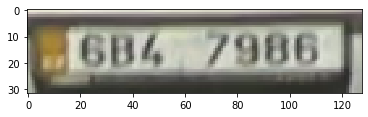

(14000, 16, 64, 3)


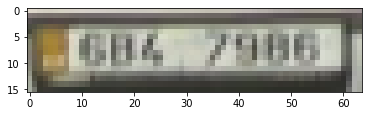

'\n# convert the class labels to 10-dimensional class arrays:\n# - before: y_train = (n_samples, )\n# - after: Y_train = (n_samples, 10)\n#\nY_train = np_utils.to_categorical(y_train, 10)\nY_test = np_utils.to_categorical(y_test, 10)\n'

In [4]:
# preprocessing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.3, random_state=41)

del dataX, dataY
gc.collect()

"""
# reshape the data based on what backend is in use (TensorFlow or Thean)
if keras_backend.image_data_format() == 'channels_first': #Thean
    X_train = X_train.reshape(-1, 1, 28, 28)
    X_test = X_test.reshape(-1, 1, 28, 28)
else: # TensorFlow
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1) #(batch, height, width, channels)
"""
y_train
img = y_train[1, :, :, :]
plt.imshow(img)
plt.show()

print(X_train.shape)

img = X_train[1, :, :, :]
plt.imshow(img)
plt.show()

# convert data type and normalize the values (8-bit = 256 = 0...255)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
y_train = y_train.astype('float32') / 255
y_test = y_test.astype('float32') / 255
"""
# convert the class labels to 10-dimensional class arrays:
# - before: y_train = (n_samples, )
# - after: Y_train = (n_samples, 10)
#
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
"""


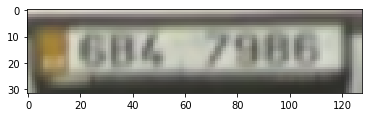

26.527907848358154


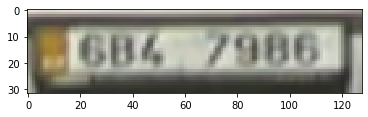

30.493738651275635


In [5]:
img = cv2.resize(X_train[1, :, :, :], (128, 32))
plt.imshow(img)
plt.show()
print(PSNR(img, y_train[1, :, :, :]))

img = cv2.resize(y_train[1, :, :, :], (64, 16))
img = cv2.resize(img, (128, 32), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)
plt.show()
print(PSNR(img, y_train[1, :, :, :]))

In [12]:
# Residual Network

def SubpixelConv2D(scale, **kwargs):
    return Lambda(lambda x: tf.depth_to_space(x, scale), **kwargs)

def Denormalization(rgb_mean=np.array([0.4488, 0.4371, 0.4040]) * 255, **kwargs):
    return Lambda(lambda x: x * 127.5 + rgb_mean , **kwargs)

def origin_residual_block(inputX, filters=64, kernel_size=(3,3), increase=False):
    if keras_backend.image_data_format() == 'channels_first':
        bn_axis = 1
    else:
        bn_axis = 3
        
    #first
    x = Conv2D(filters, kernel_size, padding="same")(inputX)
    x = BatchNormalization(axis=bn_axis)(x)
    x = Activation("relu")(x)

    #second 
    x = Conv2D(filters, kernel_size, padding="same")(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x = Activation("relu")(x)
    
    if increase:
        inputX = Conv2D(filters * 4, kernel_size=(1,1), strides=stride, padding='same')(inputX)
        inputX = BatchNormalization(axis=bn_axis)(inputX)

    #shortcut
    x = Add()([x, inputX])
    x = Activation("relu")(x)
    return x

def residual_block(inputX, kernel_size, increase=False):
    if keras_backend.image_data_format() == 'channels_first':
        bn_axis = 1
    else:
        bn_axis = 3
        
    #first
    x = Conv2D(192, kernel_size, padding="same")(inputX)
    #x = BatchNormalization(axis=bn_axis)(x)
    x = Activation("relu")(x)

    #second 
    x = Conv2D(32, kernel_size, padding="same")(x)
    #x = BatchNormalization(axis=bn_axis)(x)
    #x = Activation("relu")(x)
    
    
    if increase:
        inputX = Conv2D(64 * 4, kernel_size=(1,1), strides=stride, padding='same')(inputX)
        inputX = BatchNormalization(axis=bn_axis)(inputX)

    #shortcut
    x = Add()([inputX, x])
    return x

def UNetAdd(inputs ,pretrained_weights = None, input_size = (32,128,3)):

    #https://www.zhihu.com/question/283715823
    #BN after relu
    
    # N*32*128*64
    conv1 = Conv2D(64, (3, 3), padding="same")(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation("relu")(conv1)
    conv1 = Conv2D(64, (3, 3), padding="same")(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation("relu")(conv1)
    
    # N*16*64*128
    maxPool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, (3, 3), padding="same")(maxPool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation("relu")(conv2)
    conv2 = Conv2D(128, (3, 3), padding="same")(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation("relu")(conv2)
    
    # N*8*32*256
    maxPool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, (3, 3), padding="same")(maxPool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation("relu")(conv3)
    conv3 = Conv2D(256, (3, 3), padding="same")(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation("relu")(conv3)
    
    # N*4*16*512
    maxPool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, (3, 3), padding="same")(maxPool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation("relu")(conv4)
    conv4 = Conv2D(512, (3, 3), padding="same")(conv4)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation("relu")(conv4)
    
    # N*2*8*1024
    maxPool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    conv5 = Conv2D(1024, (3, 3), padding="same")(maxPool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Activation("relu")(conv5)
    conv5 = Conv2D(512, (3, 3), padding="same")(conv5)
    conv5 = BatchNormalization()(conv5)
    conv5 = Activation("relu")(conv5)
    
    # N*4*16*512
    upConv1 = UpSampling2D(size=(2, 2))(conv5)
    conv6 = Conv2D(512, (3, 3), padding="same")(Add()([conv4,upConv1]))
    conv6 = BatchNormalization()(conv6)
    conv6 = Activation("relu")(conv6)
    conv6 = Conv2D(256, (3, 3), padding="same")(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Activation("relu")(conv6)
    
    # N*8*32*256
    upConv2 = UpSampling2D(size=(2, 2))(conv6)
    conv7 = Conv2D(256, (3, 3), padding="same")(Add()([conv3,upConv2]))
    conv7 = BatchNormalization()(conv7)
    conv7 = Activation("relu")(conv7)
    conv7 = Conv2D(128, (3, 3), padding="same")(conv7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Activation("relu")(conv7)
    
    # N*16*64*128
    upConv3 = UpSampling2D(size=(2, 2))(conv7)
    conv8 = Conv2D(128, (3, 3), padding="same")(Add()([conv2,upConv3]))
    conv8 = BatchNormalization()(conv8)
    conv8 = Activation("relu")(conv8)
    conv8 = Conv2D(64, (3, 3), padding="same")(conv8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Activation("relu")(conv8)

    # N*32*128*64
    upConv4 = UpSampling2D(size=(2, 2))(conv8)
    conv9 = Conv2D(64, (3, 3), padding="same")(Add()([conv1,upConv4]))
    conv9 = BatchNormalization()(conv9)
    conv9 = Activation("relu")(conv9)
    conv9 = Conv2D(64, (3, 3), padding="same")(conv9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Activation("relu")(conv9)
    
    # N*32*128*3
    result = Conv2D(3, (1, 1), activation='sigmoid')(conv9)
    
    return result


def ResNet(pretrained_weights = None, scale=2, num_res_blocks=8, input_size=(16,64,3)):
    inputs = Input(input_size)

    if keras_backend.image_data_format() == 'channels_first':
        bn_axis = 1
    else:
        bn_axis = 3
    
    #start
    x = Conv2D(64, (3, 3), padding='same')(inputs)
    x = BatchNormalization(axis=bn_axis)(x)
    x = Activation('relu')(x)
    #x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    #residual
    for i in range(num_res_blocks):
        #x = residual_block(x, 3)
        x = origin_residual_block(x)
        
    x = Conv2D(3 * scale**2, (3,3), padding='same')(x)
    x = SubpixelConv2D(scale)(x) # N*32*128*3

    #shortcut
    s = Conv2D(3 * scale**2, (3,3), padding='same')(inputs)
    s = SubpixelConv2D(scale)(s) # N*32*128*3
    
    result = Add()([x, s])
    #add U-net
    result = UNetAdd(result)
    
    
    
    model = Model(input = inputs, output = result)
    
    print(model.summary())

    model.compile(loss='mean_squared_error',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    
    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model
"""
keras_backend.clear_session() #release GPU memory
from numba import cuda
cuda.select_device(0)
cuda.close()
"""

model = ResNet()

model.fit(X_train, y_train,
          batch_size=64,
          epochs=100,
          verbose=1,
          validation_data=(X_test, y_test))


C:\Users\asus\Miniconda3\envs\testJ\lib\site-packages\ipykernel_launcher.py:182: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 16, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 16, 64, 64)   1792        input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_22 (BatchNo (None, 16, 64, 64)   256         conv2d_24[0][0]                  
__________________________________________________________________________________________________
activation_30 (Activation)      (None, 16, 64, 64)   0           batch_normalization_22[0][0]     
__________________________________________________________________________________________________
conv2d_25 

Train on 14000 samples, validate on 6000 samples
Epoch 1/100
14000/14000 [==============================] - 81s 6ms/step - loss: 0.0034 - acc: 0.7373 - val_loss: 0.0040 - val_acc: 0.8227
Epoch 2/100
14000/14000 [==============================] - 69s 5ms/step - loss: 9.5276e-04 - acc: 0.8483 - val_loss: 0.0022 - val_acc: 0.8556
Epoch 3/100
14000/14000 [==============================] - 68s 5ms/step - loss: 7.8087e-04 - acc: 0.8768 - val_loss: 0.0010 - val_acc: 0.8953
Epoch 4/100
14000/14000 [==============================] - 68s 5ms/step - loss: 7.0926e-04 - acc: 0.8889 - val_loss: 0.0014 - val_acc: 0.8854
Epoch 5/100
14000/14000 [==============================] - 68s 5ms/step - loss: 6.3367e-04 - acc: 0.8986 - val_loss: 0.0029 - val_acc: 0.8614
Epoch 6/100
14000/14000 [==============================] - 68s 5ms/step - loss: 6.4391e-04 - acc: 0.9012 - val_loss: 0.0010 - val_acc: 0.9028
Epoch 7/100
14000/14000 [==============================] - 68s 5ms/step - loss: 6.2668e-04 - acc: 0.905

Epoch 57/100
14000/14000 [==============================] - 68s 5ms/step - loss: 2.2136e-04 - acc: 0.9406 - val_loss: 3.0659e-04 - val_acc: 0.9443
Epoch 58/100
14000/14000 [==============================] - 68s 5ms/step - loss: 2.2844e-04 - acc: 0.9392 - val_loss: 0.0012 - val_acc: 0.9434
Epoch 59/100
14000/14000 [==============================] - 68s 5ms/step - loss: 2.1403e-04 - acc: 0.9427 - val_loss: 3.0428e-04 - val_acc: 0.9490
Epoch 60/100
14000/14000 [==============================] - 68s 5ms/step - loss: 2.2068e-04 - acc: 0.9417 - val_loss: 2.6568e-04 - val_acc: 0.9456
Epoch 61/100
14000/14000 [==============================] - 68s 5ms/step - loss: 2.1092e-04 - acc: 0.9410 - val_loss: 4.8924e-04 - val_acc: 0.9365
Epoch 62/100
14000/14000 [==============================] - 68s 5ms/step - loss: 2.1069e-04 - acc: 0.9434 - val_loss: 3.2035e-04 - val_acc: 0.8656
Epoch 63/100
14000/14000 [==============================] - 69s 5ms/step - loss: 2.1027e-04 - acc: 0.9419 - val_loss: 5.38

== mix accuracy ==
Train loss: 0.0001596276493676539
Train accuracy: 0.9517370954241071
Test loss: 0.0001907888459196935
Test accuracy: 0.9521692301432292


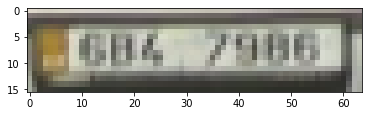

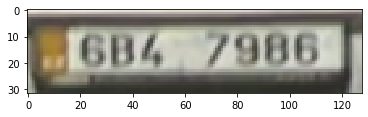

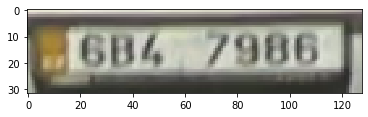

38.302791118621826
37.968904972076416


In [13]:
print("== mix accuracy ==")
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

result = model.predict(X_train)
img = X_train[1]
plt.imshow(img)
plt.show()
# show the image
img = result[1]
plt.imshow(img)
plt.show()
img = y_train[1]
plt.imshow(img)
plt.show()

print( PSNR(result[1], y_train[1]) )
print( PSNR(result, y_train) )

In [5]:
# U-net

def UNet(pretrained_weights = None, input_size = (16,64,3)):
    inputs = Input(input_size)

    upConv0 = UpSampling2D(size=(2, 2), interpolation='bilinear')(inputs)
    
    # N*32*128*64
    conv1 = Conv2D(64, (3, 3), activation='relu', padding="same")(upConv0)
    #conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding="same")(conv1)
    
    # N*16*64*128
    maxPool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding="same")(maxPool1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding="same")(conv2)
    
    # N*8*32*256
    maxPool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding="same")(maxPool2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding="same")(conv3)
    
    # N*4*16*512
    maxPool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding="same")(maxPool3)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding="same")(conv4)
    
    # N*2*8*1024
    maxPool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding="same")(maxPool4)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding="same")(conv5)
    
    # N*4*16*512
    upConv1 = UpSampling2D(size=(2, 2))(conv5)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding="same")(concatenate([conv4,upConv1], axis=3))
    conv6 = Conv2D(512, (3, 3), activation='relu', padding="same")(conv6)
    
    # N*8*32*256
    upConv2 = UpSampling2D(size=(2, 2))(conv6)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding="same")(concatenate([conv3,upConv2], axis=3))
    conv7 = Conv2D(256, (3, 3), activation='relu', padding="same")(conv7)
    
    # N*16*64*128
    upConv3 = UpSampling2D(size=(2, 2))(conv7)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding="same")(concatenate([conv2,upConv3], axis=3))
    conv8 = Conv2D(128, (3, 3), activation='relu', padding="same")(conv8)

    # N*32*128*64
    upConv4 = UpSampling2D(size=(2, 2))(conv8)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding="same")(concatenate([conv1,upConv4], axis=3))
    conv9 = Conv2D(64, (3, 3), activation='relu', padding="same")(conv9)
    
    # N*32*128*3
    result = Conv2D(3, (1, 1), activation='sigmoid')(conv9)
    
    model = Model(input = inputs, output = result)
    
    print(model.summary())

    model.compile(loss='mean_squared_error',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    
    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model
    
model = UNet()

#https://keras.io/zh/callbacks/
#keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
modelCheck = ModelCheckpoint('UNet32{epoch:08d}.h5', save_weights_only=True, save_best_only=True)
#keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
earlyStop = EarlyStopping(monitor='val_loss', patience=50)
history = History()

model.fit(X_train, y_train,
          batch_size=64,
          epochs=100,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[modelCheck, earlyStop, history])

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 16, 64, 3)    0                                            
__________________________________________________________________________________________________
up_sampling2d_1 (UpSampling2D)  (None, 32, 128, 3)   0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 128, 64)  1792        up_sampling2d_1[0][0]            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 128, 64)  36928       conv2d_1[0][0]                   
_____________________________________

C:\Users\asus\Miniconda3\envs\testJ\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


Train on 14000 samples, validate on 6000 samples
Epoch 1/100
14000/14000 [==============================] - 183s 13ms/step - loss: 0.0089 - acc: 0.7889 - val_loss: 0.0013 - val_acc: 0.8780
Epoch 2/100
14000/14000 [==============================] - 56s 4ms/step - loss: 7.8349e-04 - acc: 0.9090 - val_loss: 5.4569e-04 - val_acc: 0.9223
Epoch 3/100
14000/14000 [==============================] - 57s 4ms/step - loss: 5.7216e-04 - acc: 0.9270 - val_loss: 4.4216e-04 - val_acc: 0.9324
Epoch 4/100
14000/14000 [==============================] - 56s 4ms/step - loss: 4.4735e-04 - acc: 0.9365 - val_loss: 3.9313e-04 - val_acc: 0.9407
Epoch 5/100
14000/14000 [==============================] - 57s 4ms/step - loss: 3.9757e-04 - acc: 0.9394 - val_loss: 5.1390e-04 - val_acc: 0.9403
Epoch 6/100
14000/14000 [==============================] - 56s 4ms/step - loss: 3.6402e-04 - acc: 0.9404 - val_loss: 5.2577e-04 - val_acc: 0.9291
Epoch 7/100
14000/14000 [==============================] - 57s 4ms/step - loss: 3

KeyboardInterrupt: 

== UNet accuracy ==
Train loss: 0.00013222073924095768
Train accuracy: 0.9455398821149553
Test loss: 0.00021737746126018466
Test accuracy: 0.9457157389322917


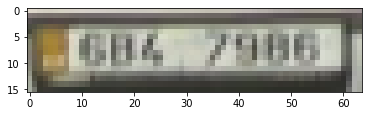

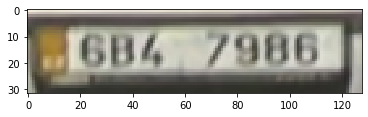

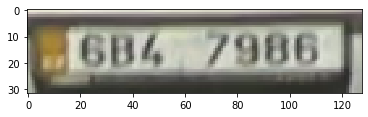

38.44512224197388
38.78701210021973
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


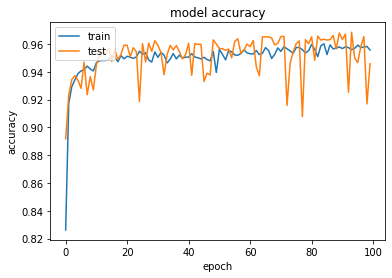

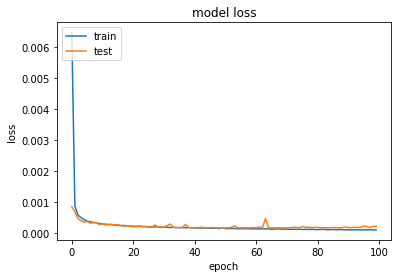

In [7]:
print("== UNet accuracy ==")
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

result = model.predict(X_train)
img = X_train[1]
plt.imshow(img)
plt.show()
# show the image
img = result[1]
plt.imshow(img)
plt.show()
img = y_train[1]
plt.imshow(img)
plt.show()
print(PSNR(y_train[1], result[1]) )
print(PSNR(y_train, result) )
printHistory(history)

C:\Users\asus\Miniconda3\envs\testJ\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 16, 64, 3)    0                                            
__________________________________________________________________________________________________
up_sampling2d_6 (UpSampling2D)  (None, 32, 128, 3)   0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 32, 128, 64)  1792        up_sampling2d_6[0][0]            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 32, 128, 64)  36928       conv2d_20[0][0]                  
__________________________________________________________________________________________________
max_poolin

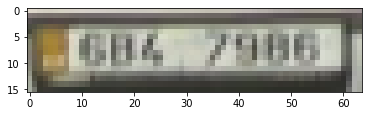

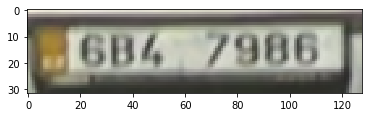

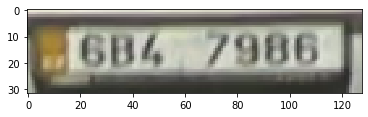

38.71704339981079
38.931920528411865


In [8]:
model2 = UNet("UNet3200000055.h5")
print("== UNet accuracy ==")
score = model2.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

result = model2.predict(X_train)
img = X_train[1]
plt.imshow(img)
plt.show()
# show the image
img = result[1]
plt.imshow(img)
plt.show()
img = y_train[1]
plt.imshow(img)
plt.show()
print(PSNR(y_train[1], result[1]) )
print(PSNR(y_train, result) )

C:\Users\asus\Miniconda3\envs\testJ\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("up...)`
  if __name__ == '__main__':


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 16, 64, 3)         0         
_________________________________________________________________
up_sampling2d_16 (UpSampling (None, 32, 128, 3)        0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
None


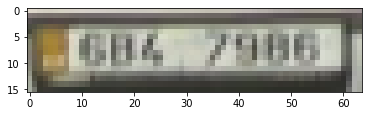

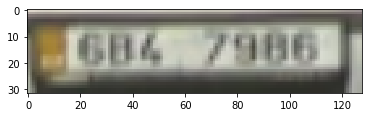

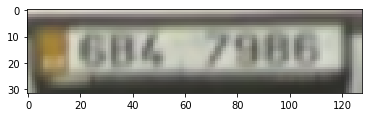

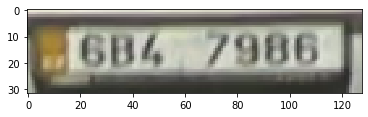

23.588621616363525
26.527907848358154
26.70764446258545


In [14]:
# CV2 的 resize 效果比 upsampling2D 好

def testUpConv(pretrained_weights = None, input_size = (16,64,3)):
    inputs = Input(input_size)

    #upConv0 = UpSampling2D(size=(2, 2), interpolation='bilinear')(inputs)
    upConv0 = UpSampling2D(size=(2, 2), interpolation='bilinear')(inputs)
    
    model = Model(input = inputs, output = upConv0)
    
    print(model.summary())

    model.compile(loss='mean_squared_error',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    
    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model
    
model3 = testUpConv()
result2 = model3.predict(X_train)


img = X_train[1]
plt.imshow(img)
plt.show()
# show the image
img = result2[1]
plt.imshow(img)
plt.show()

img2 = cv2.resize(X_train[1], (128, 32))
plt.imshow(img2)
plt.show()

img = y_train[1]
plt.imshow(img)
plt.show()
print(PSNR(y_train[1], result2[1]) )
print(PSNR(y_train[1], img2) )
print(PSNR(result2[1], img2) )

In [5]:
# U-net
from keras.layers import Conv2DTranspose

def UNetTransposeConv(pretrained_weights = None, input_size = (16,64,3)):
    inputs = Input(input_size)

    #upConv0 = UpSampling2D(size=(2, 2), interpolation='bilinear')(inputs)
    upConv0 = Conv2DTranspose(64, (3,3), strides=2, padding='same')(inputs)
    
    # N*32*128*64
    conv1 = Conv2D(64, (3, 3), activation='relu', padding="same")(upConv0)
    #conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding="same")(conv1)
    
    # N*16*64*128
    maxPool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding="same")(maxPool1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding="same")(conv2)
    
    # N*8*32*256
    maxPool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding="same")(maxPool2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding="same")(conv3)
    
    # N*4*16*512
    maxPool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding="same")(maxPool3)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding="same")(conv4)
    
    # N*2*8*1024
    maxPool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding="same")(maxPool4)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding="same")(conv5)
    
    # N*4*16*512
    #upConv1 = UpSampling2D(size=(2, 2))(conv5)
    upConv1 = Conv2DTranspose(64, (3,3), strides=2, padding='same')(conv5)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding="same")(concatenate([conv4,upConv1], axis=3))
    conv6 = Conv2D(512, (3, 3), activation='relu', padding="same")(conv6)
    
    # N*8*32*256
    #upConv2 = UpSampling2D(size=(2, 2))(conv6)
    upConv2 = Conv2DTranspose(64, (3,3), strides=2, padding='same')(conv6)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding="same")(concatenate([conv3,upConv2], axis=3))
    conv7 = Conv2D(256, (3, 3), activation='relu', padding="same")(conv7)
    
    # N*16*64*128
    #upConv3 = UpSampling2D(size=(2, 2))(conv7)
    upConv3 = Conv2DTranspose(64, (3,3), strides=2, padding='same')(conv7)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding="same")(concatenate([conv2,upConv3], axis=3))
    conv8 = Conv2D(128, (3, 3), activation='relu', padding="same")(conv8)

    # N*32*128*64
    #upConv4 = UpSampling2D(size=(2, 2))(conv8)
    upConv4 = Conv2DTranspose(64, (3,3), strides=2, padding='same')(conv8)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding="same")(concatenate([conv1,upConv4], axis=3))
    conv9 = Conv2D(64, (3, 3), activation='relu', padding="same")(conv9)
    
    # N*32*128*3
    result = Conv2D(3, (1, 1), activation='sigmoid')(conv9)
    
    model = Model(input = inputs, output = result)
    
    print(model.summary())

    model.compile(loss='mean_squared_error',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    
    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model
    
model = UNetTransposeConv()

#https://keras.io/zh/callbacks/
#keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
modelCheck = ModelCheckpoint('UNetTransposeConv2{epoch:05d}.h5', save_weights_only=True, save_best_only=True)
#keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
earlyStop = EarlyStopping(monitor='val_loss', patience=50)
history = History()

model.fit(X_train, y_train,
          batch_size=64,
          epochs=100,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[modelCheck, earlyStop, history])

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 16, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_transpose_1 (Conv2DTrans (None, 32, 128, 64)  1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 128, 64)  36928       conv2d_transpose_1[0][0]         
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 128, 64)  36928       conv2d_1[0][0]                   
_____________________________________

C:\Users\asus\Miniconda3\envs\testJ\lib\site-packages\ipykernel_launcher.py:62: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


Train on 14000 samples, validate on 6000 samples
Epoch 1/100
14000/14000 [==============================] - 60s 4ms/step - loss: 0.0086 - acc: 0.7682 - val_loss: 0.0012 - val_acc: 0.8349
Epoch 2/100
14000/14000 [==============================] - 51s 4ms/step - loss: 7.9647e-04 - acc: 0.8351 - val_loss: 7.0831e-04 - val_acc: 0.8590
Epoch 3/100
14000/14000 [==============================] - 51s 4ms/step - loss: 4.6140e-04 - acc: 0.9136 - val_loss: 4.5652e-04 - val_acc: 0.9157
Epoch 4/100
14000/14000 [==============================] - 51s 4ms/step - loss: 3.9428e-04 - acc: 0.9207 - val_loss: 3.4741e-04 - val_acc: 0.9021
Epoch 5/100
14000/14000 [==============================] - 51s 4ms/step - loss: 3.5142e-04 - acc: 0.9242 - val_loss: 3.2765e-04 - val_acc: 0.9194
Epoch 6/100
14000/14000 [==============================] - 51s 4ms/step - loss: 3.1513e-04 - acc: 0.9297 - val_loss: 3.0818e-04 - val_acc: 0.9397
Epoch 7/100
14000/14000 [==============================] - 52s 4ms/step - loss: 2.9

== UNetTransposeConv accuracy ==
Train loss: 0.00010160017558207204
Train accuracy: 0.9475961216517857
Test loss: 0.00019543033353208253
Test accuracy: 0.9478195393880209


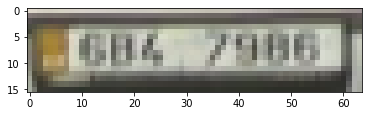

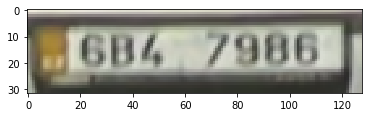

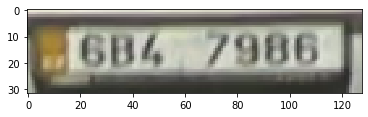

39.714229106903076
39.93105411529541
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


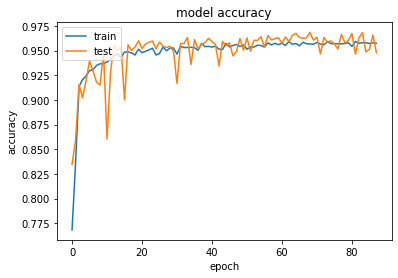

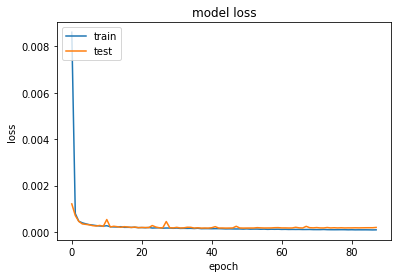

In [6]:
print("== UNetTransposeConv accuracy ==")
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

result = model.predict(X_train)
img = X_train[1]
plt.imshow(img)
plt.show()
# show the image
img = result[1]
plt.imshow(img)
plt.show()
img = y_train[1]
plt.imshow(img)
plt.show()
print(PSNR(y_train[1], result[1]) )
print(PSNR(y_train, result) )
printHistory(history)

In [7]:
def UNetRes(pretrained_weights = None, input_size = (16,64,3)):
    inputs = Input(input_size)

    #upConv0 = UpSampling2D(size=(2, 2), interpolation='bilinear')(inputs)
    upConv0 = Conv2DTranspose(64, (3,3), strides=2, padding='same')(inputs)
    
    # N*32*128*64
    conv1 = Conv2D(64, (3, 3), activation='relu', padding="same")(upConv0)
    #conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding="same")(conv1)
    
    # N*16*64*128
    maxPool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding="same")(maxPool1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding="same")(conv2)
    
    # N*8*32*256
    maxPool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding="same")(maxPool2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding="same")(conv3)
    
    # N*4*16*512
    maxPool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding="same")(maxPool3)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding="same")(conv4)
    
    # N*2*8*1024
    maxPool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding="same")(maxPool4)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding="same")(conv5)
    
    # N*4*16*512
    #upConv1 = UpSampling2D(size=(2, 2))(conv5)
    upConv1 = Conv2DTranspose(512, (3,3), strides=2, padding='same')(conv5)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding="same")(Add()([conv4,upConv1]))
    conv6 = Conv2D(512, (3, 3), activation='relu', padding="same")(conv6)
    
    # N*8*32*256
    #upConv2 = UpSampling2D(size=(2, 2))(conv6)
    upConv2 = Conv2DTranspose(256, (3,3), strides=2, padding='same')(conv6)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding="same")(Add()([conv3,upConv2]))
    conv7 = Conv2D(256, (3, 3), activation='relu', padding="same")(conv7)
    
    # N*16*64*128
    #upConv3 = UpSampling2D(size=(2, 2))(conv7)
    upConv3 = Conv2DTranspose(128, (3,3), strides=2, padding='same')(conv7)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding="same")(Add()([conv2,upConv3]))
    conv8 = Conv2D(128, (3, 3), activation='relu', padding="same")(conv8)

    # N*32*128*64
    #upConv4 = UpSampling2D(size=(2, 2))(conv8)
    upConv4 = Conv2DTranspose(64, (3,3), strides=2, padding='same')(conv8)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding="same")(Add()([conv1,upConv4]))
    conv9 = Conv2D(64, (3, 3), activation='relu', padding="same")(conv9)
    
    # N*32*128*3
    result = Conv2D(3, (1, 1), activation='sigmoid')(conv9)
    
    model = Model(input = inputs, output = result)
    
    print(model.summary())

    model.compile(loss='mean_squared_error',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    
    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model
    
model = UNetRes()

#https://keras.io/zh/callbacks/
#keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
modelCheck = ModelCheckpoint('UNetRes{epoch:08d}.h5', save_weights_only=True, save_best_only=True)
#keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
earlyStop = EarlyStopping(monitor='val_loss', patience=50)
history = History()

model.fit(X_train, y_train,
          batch_size=64,
          epochs=100,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[modelCheck, earlyStop, history])

C:\Users\asus\Miniconda3\envs\testJ\lib\site-packages\ipykernel_launcher.py:59: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 16, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_transpose_6 (Conv2DTrans (None, 32, 128, 64)  1792        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_74 (Conv2D)              (None, 32, 128, 64)  36928       conv2d_transpose_6[0][0]         
__________________________________________________________________________________________________
conv2d_75 (Conv2D)              (None, 32, 128, 64)  36928       conv2d_74[0][0]                  
__________________________________________________________________________________________________
max_poolin

Epoch 62/100
14000/14000 [==============================] - 55s 4ms/step - loss: 1.0707e-04 - acc: 0.9598 - val_loss: 1.7529e-04 - val_acc: 0.9533
Epoch 63/100
14000/14000 [==============================] - 55s 4ms/step - loss: 1.2596e-04 - acc: 0.9531 - val_loss: 1.7244e-04 - val_acc: 0.9658
Epoch 64/100
14000/14000 [==============================] - 54s 4ms/step - loss: 1.0114e-04 - acc: 0.9628 - val_loss: 1.8532e-04 - val_acc: 0.9700
Epoch 65/100
14000/14000 [==============================] - 55s 4ms/step - loss: 1.0072e-04 - acc: 0.9620 - val_loss: 1.7391e-04 - val_acc: 0.9686
Epoch 66/100
14000/14000 [==============================] - 55s 4ms/step - loss: 1.0574e-04 - acc: 0.9581 - val_loss: 1.7774e-04 - val_acc: 0.9347
Epoch 67/100
14000/14000 [==============================] - 55s 4ms/step - loss: 1.0036e-04 - acc: 0.9595 - val_loss: 1.7742e-04 - val_acc: 0.9642
Epoch 68/100
14000/14000 [==============================] - 55s 4ms/step - loss: 9.9186e-05 - acc: 0.9612 - val_loss: 

== UNetRes accuracy ==
Train loss: 6.948732817545534e-05
Train accuracy: 0.9646654227120536
Test loss: 0.00018607992461572092
Test accuracy: 0.9647569986979166


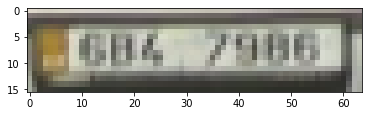

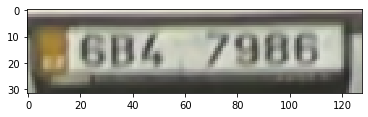

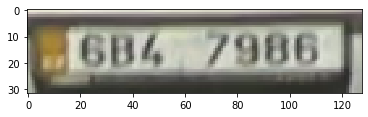

41.215057373046875
41.580939292907715
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


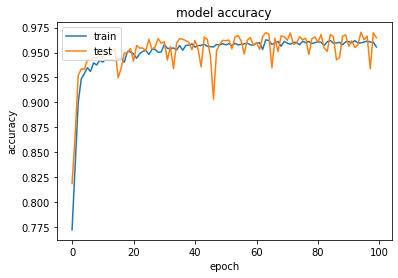

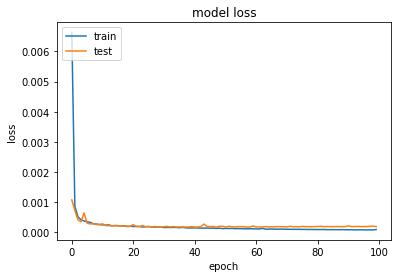

In [8]:
print("== UNetRes accuracy ==")
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

result = model.predict(X_train)
img = X_train[1]
plt.imshow(img)
plt.show()
# show the image
img = result[1]
plt.imshow(img)
plt.show()
img = y_train[1]
plt.imshow(img)
plt.show()
print(PSNR(y_train[1], result[1]) )
print(PSNR(y_train, result) )
printHistory(history)

In [5]:
# version4
def Inception_block(inputX, filters=64, kernel_size=(3,3), increase=False):
    a = AveragePooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(inputX)
    a = Conv2D(96, (1, 1), activation="relu", padding="same")(a)
    
    b = Conv2D(96, (1, 1), activation="relu", padding="same")(inputX)
    
    c = Conv2D(64, (1, 1), activation="relu", padding="same")(inputX)
    c = Conv2D(96, (3, 3), activation="relu", padding="same")(c)
    
    d = Conv2D(64, (1, 1), activation="relu", padding="same")(inputX)
    d = Conv2D(96, (3, 3), activation="relu", padding="same")(d)
    d = Conv2D(96, (3, 3), activation="relu", padding="same")(d)
    
    result = concatenate([a, b, c, d], axis=3)
    
    return result

def Inception_resnet_block(inputX, filterSize):
    #google v4res 
    finalSize = filterSize
    filterSize = 64
    
    a = Conv2D(filterSize, (1, 1), activation="relu", padding="same")(inputX)
    
    b = Conv2D(filterSize, (1, 1), activation="relu", padding="same")(inputX)
    b = Conv2D(filterSize, (3, 3), activation="relu", padding="same")(b)
    
    c = Conv2D(filterSize, (1, 1), activation="relu", padding="same")(inputX)
    c = Conv2D(filterSize*3//2, (3, 3), activation="relu", padding="same")(c)
    c = Conv2D(filterSize*3//2, (3, 3), activation="relu", padding="same")(c)

    filterSize = finalSize
    
    merge = concatenate([a, b, c], axis=3)
    merge = Conv2D(filterSize, (1, 1), activation="relu", padding="same")(merge)
    
    #shortcut
    result = Add()([merge, inputX])
    result = Activation("relu")(result)
    
    return result

def Inception(pretrained_weights = None, input_size = (16,64,3)):
    inputs = Input(input_size)

    #upConv0 = UpSampling2D(size=(2, 2), interpolation='bilinear')(inputs)
    upConv0 = Conv2DTranspose(64, (3,3), strides=2, padding='same')(inputs)
    
    # N*32*128*64
    conv1 = Conv2D(64, (1, 1), activation='relu', padding="same")(upConv0)
    #conv1 = BatchNormalization()(conv1)
    conv1 = Inception_resnet_block(conv1, 64)
    #conv1 = Inception_resnet_block(conv1, 64)
    
    # N*16*64*128
    maxPool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, (1, 1), activation='relu', padding="same")(maxPool1)
    conv2 = Inception_resnet_block(conv2, 128)
    #conv2 = Inception_resnet_block(conv2, 128)
    
    # N*8*32*256
    maxPool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, (1, 1), activation='relu', padding="same")(maxPool2)
    conv3 = Inception_resnet_block(conv3, 256)
    #conv3 = Inception_resnet_block(conv3, 256)
    
    # N*4*16*512
    maxPool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, (1, 1), activation='relu', padding="same")(maxPool3)
    conv4 = Inception_resnet_block(conv4, 512)
    #conv4 = Inception_resnet_block(conv4, 512)
    
    # N*2*8*1024
    maxPool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    conv5 = Conv2D(1024, (1, 1), activation='relu', padding="same")(maxPool4)
    conv5 = Inception_resnet_block(conv5, 1024)
    #conv5 = Inception_resnet_block(conv5, 1024)
    
    # N*4*16*512
    #upConv1 = UpSampling2D(size=(2, 2))(conv5)
    upConv1 = Conv2DTranspose(64, (3,3), strides=2, padding='same')(conv5)
    conv6 = Conv2D(512, (1, 1), activation='relu', padding="same")(concatenate([conv4,upConv1], axis=3))
    conv6 = Inception_resnet_block(conv6, 512)
    #conv6 = Inception_resnet_block(conv6, 512)
    
    # N*8*32*256
    #upConv2 = UpSampling2D(size=(2, 2))(conv6)
    upConv2 = Conv2DTranspose(64, (3,3), strides=2, padding='same')(conv6)
    conv7 = Conv2D(256, (1, 1), activation='relu', padding="same")(concatenate([conv3,upConv2], axis=3))
    conv7 = Inception_resnet_block(conv7, 256)
    #conv7 = Inception_resnet_block(conv7, 256)
    
    # N*16*64*128
    #upConv3 = UpSampling2D(size=(2, 2))(conv7)
    upConv3 = Conv2DTranspose(64, (3,3), strides=2, padding='same')(conv7)
    conv8 = Conv2D(128, (1, 1), activation='relu', padding="same")(concatenate([conv2,upConv3], axis=3))
    conv8 = Inception_block(conv8, 128)
    #conv8 = Inception_block(conv8, 128)

    # N*32*128*64
    #upConv4 = UpSampling2D(size=(2, 2))(conv8)
    upConv4 = Conv2DTranspose(64, (3,3), strides=2, padding='same')(conv8)
    conv9 = Conv2D(64, (1, 1), activation='relu', padding="same")(concatenate([conv1,upConv4], axis=3))
    conv9 = Inception_resnet_block(conv9, 64)
    #conv9 = Inception_resnet_block(conv9, 64)
    
    # N*32*128*3
    result = Conv2D(3, (1, 1), activation='sigmoid')(conv9)
    
    model = Model(input = inputs, output = result)
    
    print(model.summary())

    model.compile(loss='mean_squared_error',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    
    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model
    
model = Inception()

#https://keras.io/zh/callbacks/
#keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
modelCheck = ModelCheckpoint('Inception{epoch:03d}.h5', save_weights_only=True, save_best_only=True)
#keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
earlyStop = EarlyStopping(monitor='val_loss', patience=50)
history = History()

model.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[modelCheck, earlyStop, history])

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 16, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_transpose_1 (Conv2DTrans (None, 32, 128, 64)  1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 128, 64)  4160        conv2d_transpose_1[0][0]         
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 32, 128, 64)  4160        conv2d_1[0][0]                   
_____________________________________

C:\Users\asus\Miniconda3\envs\testJ\lib\site-packages\ipykernel_launcher.py:111: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


Train on 14000 samples, validate on 6000 samples
Epoch 1/100
14000/14000 [==============================] - 117s 8ms/step - loss: 0.0018 - acc: 0.8627 - val_loss: 3.6244e-04 - val_acc: 0.9403
Epoch 2/100
14000/14000 [==============================] - 110s 8ms/step - loss: 3.5523e-04 - acc: 0.9319 - val_loss: 2.9932e-04 - val_acc: 0.9524
Epoch 3/100
14000/14000 [==============================] - 110s 8ms/step - loss: 2.9906e-04 - acc: 0.9419 - val_loss: 2.8160e-04 - val_acc: 0.9544
Epoch 4/100
14000/14000 [==============================] - 111s 8ms/step - loss: 2.8161e-04 - acc: 0.9412 - val_loss: 2.5209e-04 - val_acc: 0.9320
Epoch 5/100
14000/14000 [==============================] - 113s 8ms/step - loss: 2.5738e-04 - acc: 0.9432 - val_loss: 2.3863e-04 - val_acc: 0.9544
Epoch 6/100
14000/14000 [==============================] - 113s 8ms/step - loss: 2.4848e-04 - acc: 0.9430 - val_loss: 3.6333e-04 - val_acc: 0.9467
Epoch 7/100
14000/14000 [==============================] - 115s 8ms/step 

== Inception accuracy ==
Train loss: 9.432994612559144e-05
Train accuracy: 0.9553884626116071
Test loss: 0.00016934545586506526
Test accuracy: 0.955727294921875


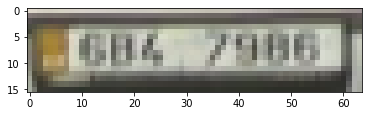

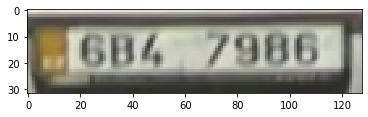

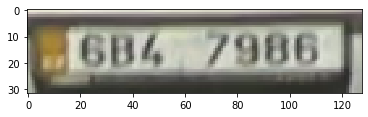

39.70258951187134
40.25351047515869
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


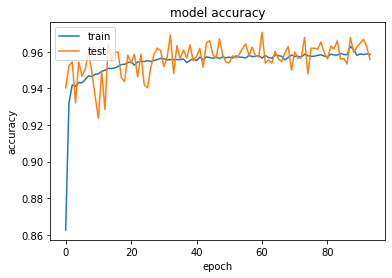

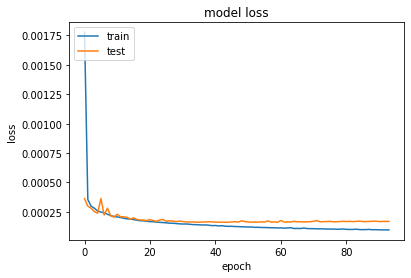

In [6]:
print("== Inception accuracy ==")
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

result = model.predict(X_train)
img = X_train[1]
plt.imshow(img)
plt.show()
# show the image
img = result[1]
plt.imshow(img)
plt.show()
img = y_train[1]
plt.imshow(img)
plt.show()
print(PSNR(y_train[1], result[1]) )
print(PSNR(y_train, result) )
printHistory(history)

In [ ]:
# version4
def Inception_block(inputX, filters=64, kernel_size=(3,3), increase=False):
    a = AveragePooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(inputX)
    a = Conv2D(96, (1, 1), activation="relu", padding="same")(a)
    
    b = Conv2D(96, (1, 1), activation="relu", padding="same")(inputX)
    
    c = Conv2D(64, (1, 1), activation="relu", padding="same")(inputX)
    c = Conv2D(96, (3, 3), activation="relu", padding="same")(c)
    
    d = Conv2D(64, (1, 1), activation="relu", padding="same")(inputX)
    d = Conv2D(96, (3, 3), activation="relu", padding="same")(d)
    d = Conv2D(96, (3, 3), activation="relu", padding="same")(d)
    
    result = concatenate([a, b, c, d], axis=3)
    
    return result

def Inception_resnet_block(inputX, filterSize):
    #google v4res 
    finalSize = filterSize
    filterSize = 64
    
    a = Conv2D(filterSize, (1, 1), activation="relu", padding="same")(inputX)
    
    b = Conv2D(filterSize, (1, 1), activation="relu", padding="same")(inputX)
    b = Conv2D(filterSize, (3, 3), activation="relu", padding="same")(b)
    
    c = Conv2D(filterSize, (1, 1), activation="relu", padding="same")(inputX)
    c = Conv2D(filterSize*3//2, (3, 3), activation="relu", padding="same")(c)
    c = Conv2D(filterSize*3//2, (3, 3), activation="relu", padding="same")(c)

    filterSize = finalSize
    
    merge = concatenate([a, b, c], axis=3)
    merge = Conv2D(filterSize, (1, 1), activation="relu", padding="same")(merge)
    
    #shortcut
    result = Add()([merge, inputX])
    result = Activation("relu")(result)
    
    return result

def Inception(pretrained_weights = None, input_size = (16,64,3)):
    inputs = Input(input_size)

    #upConv0 = UpSampling2D(size=(2, 2), interpolation='bilinear')(inputs)
    upConv0 = Conv2DTranspose(64, (3,3), strides=2, padding='same')(inputs)
    
    # N*32*128*64
    conv1 = Conv2D(64, (1, 1), activation='relu', padding="same")(upConv0)
    #conv1 = BatchNormalization()(conv1)
    conv1 = Inception_resnet_block(conv1, 64)
    #conv1 = Inception_resnet_block(conv1, 64)
    
    # N*16*64*128
    maxPool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, (1, 1), activation='relu', padding="same")(maxPool1)
    conv2 = Inception_resnet_block(conv2, 128)
    #conv2 = Inception_resnet_block(conv2, 128)
    
    # N*8*32*256
    maxPool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, (1, 1), activation='relu', padding="same")(maxPool2)
    conv3 = Inception_resnet_block(conv3, 256)
    #conv3 = Inception_resnet_block(conv3, 256)
    
    # N*4*16*512
    maxPool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, (1, 1), activation='relu', padding="same")(maxPool3)
    conv4 = Inception_resnet_block(conv4, 512)
    #conv4 = Inception_resnet_block(conv4, 512)
    
    # N*2*8*1024
    maxPool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    conv5 = Conv2D(1024, (1, 1), activation='relu', padding="same")(maxPool4)
    conv5 = Inception_resnet_block(conv5, 1024)
    #conv5 = Inception_resnet_block(conv5, 1024)
    
    # N*4*16*512
    #upConv1 = UpSampling2D(size=(2, 2))(conv5)
    upConv1 = Conv2DTranspose(64, (3,3), strides=2, padding='same')(conv5)
    conv6 = Conv2D(512, (1, 1), activation='relu', padding="same")(concatenate([conv4,upConv1], axis=3))
    conv6 = Inception_resnet_block(conv6, 512)
    #conv6 = Inception_resnet_block(conv6, 512)
    
    # N*8*32*256
    #upConv2 = UpSampling2D(size=(2, 2))(conv6)
    upConv2 = Conv2DTranspose(64, (3,3), strides=2, padding='same')(conv6)
    conv7 = Conv2D(256, (1, 1), activation='relu', padding="same")(concatenate([conv3,upConv2], axis=3))
    conv7 = Inception_resnet_block(conv7, 256)
    #conv7 = Inception_resnet_block(conv7, 256)
    
    # N*16*64*128
    #upConv3 = UpSampling2D(size=(2, 2))(conv7)
    upConv3 = Conv2DTranspose(64, (3,3), strides=2, padding='same')(conv7)
    conv8 = Conv2D(128, (1, 1), activation='relu', padding="same")(concatenate([conv2,upConv3], axis=3))
    conv8 = Inception_block(conv8, 128)
    #conv8 = Inception_block(conv8, 128)

    # N*32*128*64
    #upConv4 = UpSampling2D(size=(2, 2))(conv8)
    upConv4 = Conv2DTranspose(64, (3,3), strides=2, padding='same')(conv8)
    conv9 = Conv2D(64, (1, 1), activation='relu', padding="same")(concatenate([conv1,upConv4], axis=3))
    conv9 = Inception_resnet_block(conv9, 64)
    #conv9 = Inception_resnet_block(conv9, 64)
    
    # N*32*128*3
    result = Conv2D(3, (1, 1), activation='sigmoid')(conv9)
    
    model = Model(input = inputs, output = result)
    
    print(model.summary())

    model.compile(loss='mean_squared_error',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    
    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model
    
model = Inception()

#https://keras.io/zh/callbacks/
#keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
modelCheck = ModelCheckpoint('Inception{epoch:03d}.h5', save_weights_only=True, save_best_only=True)
#keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
earlyStop = EarlyStopping(monitor='val_loss', patience=50)
history = History()

model.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[modelCheck, earlyStop, history])

In [9]:
# Residual Network
from keras.layers import Lambda
import tensorflow as tf

def SubpixelConv2D(scale, **kwargs):
    return Lambda(lambda x: tf.depth_to_space(x, scale), **kwargs)

def residual_block(inputX, kernel_size, increase=False):
    if keras_backend.image_data_format() == 'channels_first':
        bn_axis = 1
    else:
        bn_axis = 3
        
    #first
    x = Conv2D(192, kernel_size, padding="same")(inputX)
    x = Activation("relu")(x)

    #second 
    x = Conv2D(64, kernel_size, padding="same")(x)
    
    if increase:
        inputX = Conv2D(64 * 4, kernel_size=(1,1), strides=stride, padding='same')(inputX)
        inputX = BatchNormalization(axis=bn_axis)(inputX)

    #shortcut
    x = Add()([x, inputX])
    return x


def wdsra(pretrained_weights = None, scale=2, num_res_blocks=8, input_size=(16,64,3)):
    inputs = Input(input_size)
    
    #start
    x = Conv2D(64, (3, 3), padding='same')(inputs)
    #x = BatchNormalization(axis=bn_axis)(x)
    #x = Activation('relu')(x)
    #x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    #residual
    for i in range(num_res_blocks):
        x = residual_block(x, 3)
        #x = origin_residual_block(x)
    x = Conv2D(3 * scale**2, (3,3), padding='same')(x)
    x = SubpixelConv2D(scale)(x) # N*32*128*3

    #shortcut
    s = Conv2D(3 * scale**2, (5,5), padding='same')(inputs)
    s = SubpixelConv2D(scale)(s) # N*32*128*3
    
    result = Add()([x, s])
    
    model = Model(input = inputs, output = result)
    
    print(model.summary())

    model.compile(loss='mean_squared_error',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    
    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model
"""
keras_backend.clear_session() #release GPU memory
from numba import cuda
cuda.select_device(0)
cuda.close()
"""

model = wdsra()

#https://keras.io/zh/callbacks/
#keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
modelCheck = ModelCheckpoint('wdsra{epoch:08d}.h5', save_weights_only=True, save_best_only=True)
#keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
earlyStop = EarlyStopping(monitor='val_loss', patience=50)
history = History()

model.fit(X_train, y_train,
          batch_size=64,
          epochs=100,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[modelCheck, earlyStop, history])


C:\Users\asus\Miniconda3\envs\testJ\lib\site-packages\ipykernel_launcher.py:52: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ad...)`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 16, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_93 (Conv2D)              (None, 16, 64, 64)   1792        input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 16, 64, 192)  110784      conv2d_93[0][0]                  
__________________________________________________________________________________________________
activation_9 (Activation)       (None, 16, 64, 192)  0           conv2d_94[0][0]                  
__________________________________________________________________________________________________
conv2d_95 

Train on 14000 samples, validate on 6000 samples
Epoch 1/100
14000/14000 [==============================] - 35s 3ms/step - loss: 0.2708 - acc: 0.5516 - val_loss: 0.0021 - val_acc: 0.6778
Epoch 2/100
14000/14000 [==============================] - 31s 2ms/step - loss: 0.0017 - acc: 0.7115 - val_loss: 0.0016 - val_acc: 0.7940
Epoch 3/100
14000/14000 [==============================] - 31s 2ms/step - loss: 0.0012 - acc: 0.7621 - val_loss: 9.4162e-04 - val_acc: 0.8078
Epoch 4/100
14000/14000 [==============================] - 31s 2ms/step - loss: 9.2301e-04 - acc: 0.7994 - val_loss: 8.4045e-04 - val_acc: 0.8007
Epoch 5/100
14000/14000 [==============================] - 31s 2ms/step - loss: 8.5566e-04 - acc: 0.8113 - val_loss: 7.1870e-04 - val_acc: 0.8459
Epoch 6/100
14000/14000 [==============================] - 31s 2ms/step - loss: 7.9071e-04 - acc: 0.8222 - val_loss: 6.6731e-04 - val_acc: 0.8493
Epoch 7/100
14000/14000 [==============================] - 32s 2ms/step - loss: 7.9322e-04 - ac

== wdsra accuracy ==
Train loss: 0.00016129532509616442
Train accuracy: 0.949407958984375
Test loss: 0.00017580732295755297
Test accuracy: 0.9495086263020833


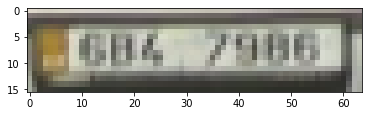

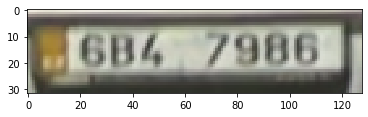

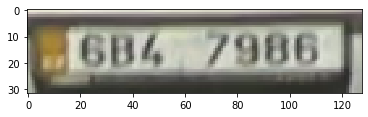

37.951529026031494
37.92377710342407
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


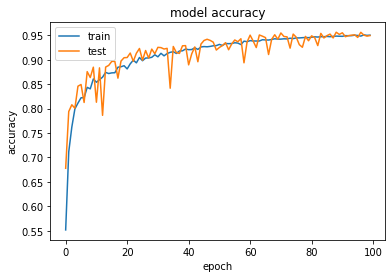

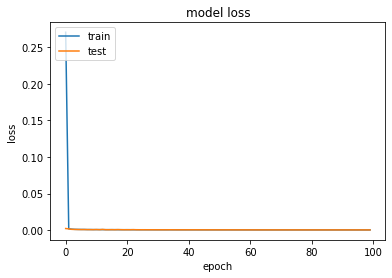

In [10]:
print("== wdsra accuracy ==") #Residual
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

result = model.predict(X_train)
img = X_train[1]
plt.imshow(img)
plt.show()
# show the image
img = result[1]
plt.imshow(img)
plt.show()
img = y_train[1]
plt.imshow(img)
plt.show()

print(PSNR(y_train[1], result[1]) )
print(PSNR(y_train, result) )

printHistory(history)

In [11]:
model = wdsra("wdsra00000099.h5")

#https://keras.io/zh/callbacks/
#keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
modelCheck = ModelCheckpoint('wdsra2{epoch:04d}.h5', save_weights_only=True, save_best_only=True)
#keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
earlyStop = EarlyStopping(monitor='val_loss', patience=50)
history = History()

model.fit(X_train, y_train,
          batch_size=64,
          epochs=200,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[modelCheck, earlyStop, history])

C:\Users\asus\Miniconda3\envs\testJ\lib\site-packages\ipykernel_launcher.py:52: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ad...)`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 16, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_112 (Conv2D)             (None, 16, 64, 64)   1792        input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_113 (Conv2D)             (None, 16, 64, 192)  110784      conv2d_112[0][0]                 
__________________________________________________________________________________________________
activation_17 (Activation)      (None, 16, 64, 192)  0           conv2d_113[0][0]                 
__________________________________________________________________________________________________
conv2d_114

Train on 14000 samples, validate on 6000 samples
Epoch 1/200
14000/14000 [==============================] - 34s 2ms/step - loss: 1.8544e-04 - acc: 0.9443 - val_loss: 1.6879e-04 - val_acc: 0.9516
Epoch 2/200
14000/14000 [==============================] - 31s 2ms/step - loss: 1.5824e-04 - acc: 0.9539 - val_loss: 1.7386e-04 - val_acc: 0.9582
Epoch 3/200
14000/14000 [==============================] - 31s 2ms/step - loss: 1.5948e-04 - acc: 0.9531 - val_loss: 1.7184e-04 - val_acc: 0.9479
Epoch 4/200
14000/14000 [==============================] - 31s 2ms/step - loss: 1.6055e-04 - acc: 0.9523 - val_loss: 1.7389e-04 - val_acc: 0.9595
Epoch 5/200
14000/14000 [==============================] - 31s 2ms/step - loss: 1.6144e-04 - acc: 0.9513 - val_loss: 1.7426e-04 - val_acc: 0.9540
Epoch 6/200
14000/14000 [==============================] - 31s 2ms/step - loss: 1.6154e-04 - acc: 0.9512 - val_loss: 1.7408e-04 - val_acc: 0.9602
Epoch 7/200
14000/14000 [==============================] - 31s 2ms/step - l

== wdsra2 accuracy ==
Train loss: 16206.433863839286
Train accuracy: 0.31595949009486607
Test loss: 17399.803018229166
Test accuracy: 0.31379353841145835


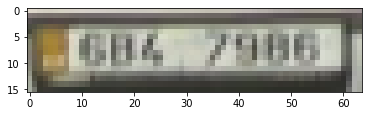

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


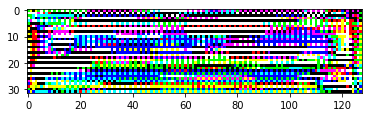

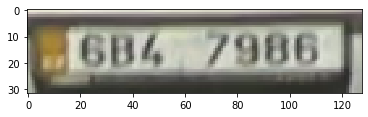

-41.83249473571777
-42.09688663482666
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


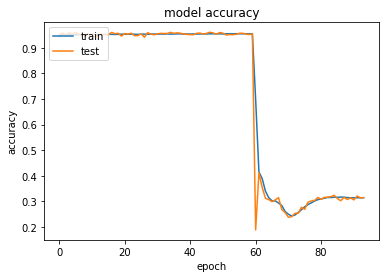

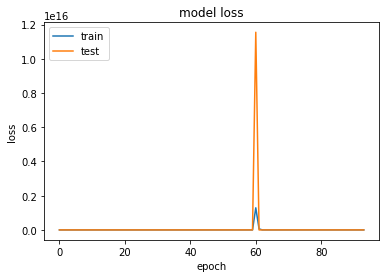

In [12]:
print("== wdsra2 accuracy ==") #Residual
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

result = model.predict(X_train)
img = X_train[1]
plt.imshow(img)
plt.show()
# show the image
img = result[1]
plt.imshow(img)
plt.show()
img = y_train[1]
plt.imshow(img)
plt.show()

print(PSNR(y_train[1], result[1]) )
print(PSNR(y_train, result) )

printHistory(history)

C:\Users\asus\Miniconda3\envs\testJ\lib\site-packages\ipykernel_launcher.py:52: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ad...)`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 16, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_150 (Conv2D)             (None, 16, 64, 64)   1792        input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_151 (Conv2D)             (None, 16, 64, 192)  110784      conv2d_150[0][0]                 
__________________________________________________________________________________________________
activation_33 (Activation)      (None, 16, 64, 192)  0           conv2d_151[0][0]                 
__________________________________________________________________________________________________
conv2d_152

== wdsra2 accuracy ==
Train loss: 0.0001269789976899379
Train accuracy: 0.9578517543247768
Test loss: 0.00016187015905355415
Test accuracy: 0.95782080078125


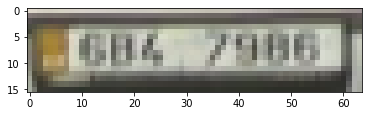

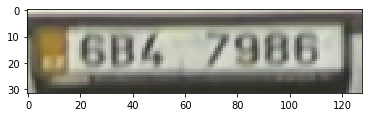

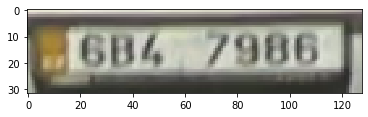

38.84543418884277
38.962697982788086


In [14]:
model = wdsra("wdsra20044.h5")
print("== wdsra2 accuracy ==") #Residual
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

result = model.predict(X_train)
img = X_train[1]
plt.imshow(img)
plt.show()
# show the image
img = result[1]
plt.imshow(img)
plt.show()
img = y_train[1]
plt.imshow(img)
plt.show()

print(PSNR(y_train[1], result[1]) )
print(PSNR(y_train, result) )


In [7]:
from keras.layers import Lambda
import tensorflow as tf

def SubpixelConv2D(scale, **kwargs):
    return Lambda(lambda x: tf.depth_to_space(x, scale), **kwargs)

def Inception_block(inputX, filters=64, kernel_size=(3,3), increase=False):
    a = AveragePooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(inputX)
    a = Conv2D(96, (1, 1), activation="relu", padding="same")(a)
    
    b = Conv2D(96, (1, 1), activation="relu", padding="same")(inputX)
    
    c = Conv2D(64, (1, 1), activation="relu", padding="same")(inputX)
    c = Conv2D(96, (3, 3), activation="relu", padding="same")(c)
    
    d = Conv2D(64, (1, 1), activation="relu", padding="same")(inputX)
    d = Conv2D(96, (3, 3), activation="relu", padding="same")(d)
    d = Conv2D(96, (3, 3), activation="relu", padding="same")(d)
    
    result = concatenate([a, b, c, d], axis=3)
    
    return result

def residual_block(inputX, kernel_size, increase=False):
    if keras_backend.image_data_format() == 'channels_first':
        bn_axis = 1
    else:
        bn_axis = 3
        
    #first
    x = Conv2D(192, kernel_size, padding="same")(inputX)
    x = Activation("relu")(x)

    #second 
    x = Conv2D(64, kernel_size, padding="same")(x)
    
    if increase:
        inputX = Conv2D(64 * 4, kernel_size=(1,1), strides=stride, padding='same')(inputX)
        inputX = BatchNormalization(axis=bn_axis)(inputX)

    #shortcut
    x = Add()([x, inputX])
    return x

def Inception_resnet_block(inputX, filterSize):
    #google v4res 
    finalSize = filterSize
    filterSize = 64
    
    a = Conv2D(filterSize, (1, 1), activation="relu", padding="same")(inputX)
    
    b = Conv2D(filterSize, (1, 1), activation="relu", padding="same")(inputX)
    b = Conv2D(filterSize, (3, 3), activation="relu", padding="same")(b)
    
    c = Conv2D(filterSize, (1, 1), activation="relu", padding="same")(inputX)
    c = Conv2D(filterSize*3//2, (3, 3), activation="relu", padding="same")(c)
    c = Conv2D(filterSize*3//2, (3, 3), activation="relu", padding="same")(c)

    filterSize = finalSize
    
    merge = concatenate([a, b, c], axis=3)
    merge = Conv2D(filterSize, (1, 1), activation="relu", padding="same")(merge)
    
    #shortcut
    result = Add()([merge, inputX])
    result = Activation("relu")(result)
    
    return result

def Ensemble(pretrained_weights = None, input_size = (16,64,3), scale=2, num_res_blocks=8):
    inputs = Input(input_size)

    #upConv0 = UpSampling2D(size=(2, 2), interpolation='bilinear')(inputs)
    upConv0 = Conv2DTranspose(64, (3,3), strides=2, padding='same')(inputs)
    
    # N*32*128*64
    conv1 = Conv2D(64, (1, 1), activation='relu', padding="same")(upConv0)
    #conv1 = BatchNormalization()(conv1)
    conv1 = Inception_resnet_block(conv1, 64)
    #conv1 = Inception_resnet_block(conv1, 64)
    
    # N*16*64*128
    maxPool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, (1, 1), activation='relu', padding="same")(maxPool1)
    conv2 = Inception_resnet_block(conv2, 128)
    #conv2 = Inception_resnet_block(conv2, 128)
    
    # N*8*32*256
    maxPool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, (1, 1), activation='relu', padding="same")(maxPool2)
    conv3 = Inception_resnet_block(conv3, 256)
    #conv3 = Inception_resnet_block(conv3, 256)
    
    # N*4*16*512
    maxPool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, (1, 1), activation='relu', padding="same")(maxPool3)
    conv4 = Inception_resnet_block(conv4, 512)
    #conv4 = Inception_resnet_block(conv4, 512)
    
    # N*2*8*1024
    maxPool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    conv5 = Conv2D(1024, (1, 1), activation='relu', padding="same")(maxPool4)
    conv5 = Inception_resnet_block(conv5, 1024)
    #conv5 = Inception_resnet_block(conv5, 1024)
    
    # N*4*16*512
    #upConv1 = UpSampling2D(size=(2, 2))(conv5)
    upConv1 = Conv2DTranspose(64, (3,3), strides=2, padding='same')(conv5)
    conv6 = Conv2D(512, (1, 1), activation='relu', padding="same")(concatenate([conv4,upConv1], axis=3))
    conv6 = Inception_resnet_block(conv6, 512)
    #conv6 = Inception_resnet_block(conv6, 512)
    
    # N*8*32*256
    #upConv2 = UpSampling2D(size=(2, 2))(conv6)
    upConv2 = Conv2DTranspose(64, (3,3), strides=2, padding='same')(conv6)
    conv7 = Conv2D(256, (1, 1), activation='relu', padding="same")(concatenate([conv3,upConv2], axis=3))
    conv7 = Inception_resnet_block(conv7, 256)
    #conv7 = Inception_resnet_block(conv7, 256)
    
    # N*16*64*128
    #upConv3 = UpSampling2D(size=(2, 2))(conv7)
    upConv3 = Conv2DTranspose(64, (3,3), strides=2, padding='same')(conv7)
    conv8 = Conv2D(128, (1, 1), activation='relu', padding="same")(concatenate([conv2,upConv3], axis=3))
    conv8 = Inception_block(conv8, 128)
    #conv8 = Inception_block(conv8, 128)

    # N*32*128*64
    #upConv4 = UpSampling2D(size=(2, 2))(conv8)
    upConv4 = Conv2DTranspose(64, (3,3), strides=2, padding='same')(conv8)
    conv9 = Conv2D(64, (1, 1), activation='relu', padding="same")(concatenate([conv1,upConv4], axis=3))
    conv9 = Inception_resnet_block(conv9, 64)
    #conv9 = Inception_resnet_block(conv9, 64)
    
    # N*32*128*3
    result = Conv2D(3, (1, 1), activation='sigmoid')(conv9)
    
    
    
    #==== ResNet Part ====
    x = Conv2D(64, (3, 3), padding='same')(inputs)

    #residual
    for i in range(num_res_blocks):
        x = residual_block(x, 3)
        #x = origin_residual_block(x)
    x = Conv2D(3 * scale**2, (3,3), padding='same')(x)
    x = SubpixelConv2D(scale)(x) # N*32*128*3

    #shortcut
    s = Conv2D(3 * scale**2, (5,5), padding='same')(inputs)
    s = SubpixelConv2D(scale)(s) # N*32*128*3
    
    result = Add()([x, s, result])
    
    
    model = Model(input = inputs, output = result)
    
    
   
    print(model.summary())

    model.compile(loss='mean_squared_error',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    
    if(pretrained_weights):
        model.load_weights(pretrained_weights)
    
    return model


model = Ensemble()
"""
#https://keras.io/zh/callbacks/
#keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
modelCheck = ModelCheckpoint('Ensemble{epoch:08d}.h5', save_weights_only=True, save_best_only=True)
#keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
earlyStop = EarlyStopping(monitor='val_loss', patience=50)
history = History()

model.fit(X_train, y_train,
          batch_size=64,
          epochs=100,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[modelCheck, earlyStop, history])
"""


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 16, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_transpose_5 (Conv2DTrans (None, 32, 128, 64)  1792        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_58 (Conv2D)              (None, 32, 128, 64)  4160        conv2d_transpose_5[0][0]         
__________________________________________________________________________________________________
conv2d_62 (Conv2D)              (None, 32, 128, 64)  4160        conv2d_58[0][0]                  
__________________________________________________________________________________________________
conv2d_60 

C:\Users\asus\Miniconda3\envs\testJ\lib\site-packages\ipykernel_launcher.py:156: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ad...)`


"\n#https://keras.io/zh/callbacks/\n#keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)\nmodelCheck = ModelCheckpoint('Ensemble{epoch:08d}.h5', save_weights_only=True, save_best_only=True)\n#keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)\nearlyStop = EarlyStopping(monitor='val_loss', patience=50)\nhistory = History()\n\nmodel.fit(X_train, y_train,\n          batch_size=64,\n          epochs=100,\n          verbose=1,\n          validation_data=(X_test, y_test),\n          callbacks=[modelCheck, earlyStop, history])\n"

C:\Users\asus\Miniconda3\envs\testJ\lib\site-packages\ipykernel_launcher.py:156: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ad...)`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 16, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_transpose_10 (Conv2DTran (None, 32, 128, 64)  1792        input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_150 (Conv2D)             (None, 32, 128, 64)  4160        conv2d_transpose_10[0][0]        
__________________________________________________________________________________________________
conv2d_154 (Conv2D)             (None, 32, 128, 64)  4160        conv2d_150[0][0]                 
__________________________________________________________________________________________________
conv2d_152

== Ensemble accuracy ==
Train loss: 0.00015751112774679704
Train accuracy: 0.9445702078683036
Test loss: 0.00017607958847656847
Test accuracy: 0.9446399739583333


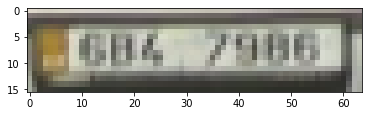

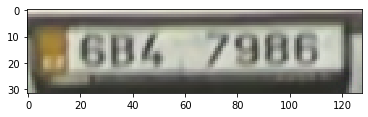

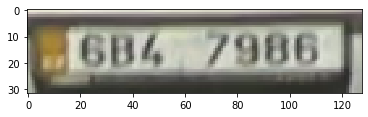

38.336660861968994
38.02689552307129


NameError: name 'history' is not defined

In [8]:
model = Ensemble("Ensemble00000043.h5")
print("== Ensemble accuracy ==")
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

result = model.predict(X_train)
img = X_train[1]
plt.imshow(img)
plt.show()
# show the image
img = result[1]
plt.imshow(img)
plt.show()
img = y_train[1]
plt.imshow(img)
plt.show()

print(PSNR(y_train[1], result[1]) )
print(PSNR(y_train, result) )
printHistory(history)